In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
images = pd.read_csv(r"C:\Users\magnu\Desktop\D7041E_FER\datasets\icml_face_data.csv")

In [3]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happines', 4:'sadness', 5:'surprise', 6:'neutral'}

In [4]:
images.columns

Index(['emotion', 'Usage', 'pixels'], dtype='object')

In [5]:
np.array(images.pixels.loc[0].split(' ')).reshape(48, 48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

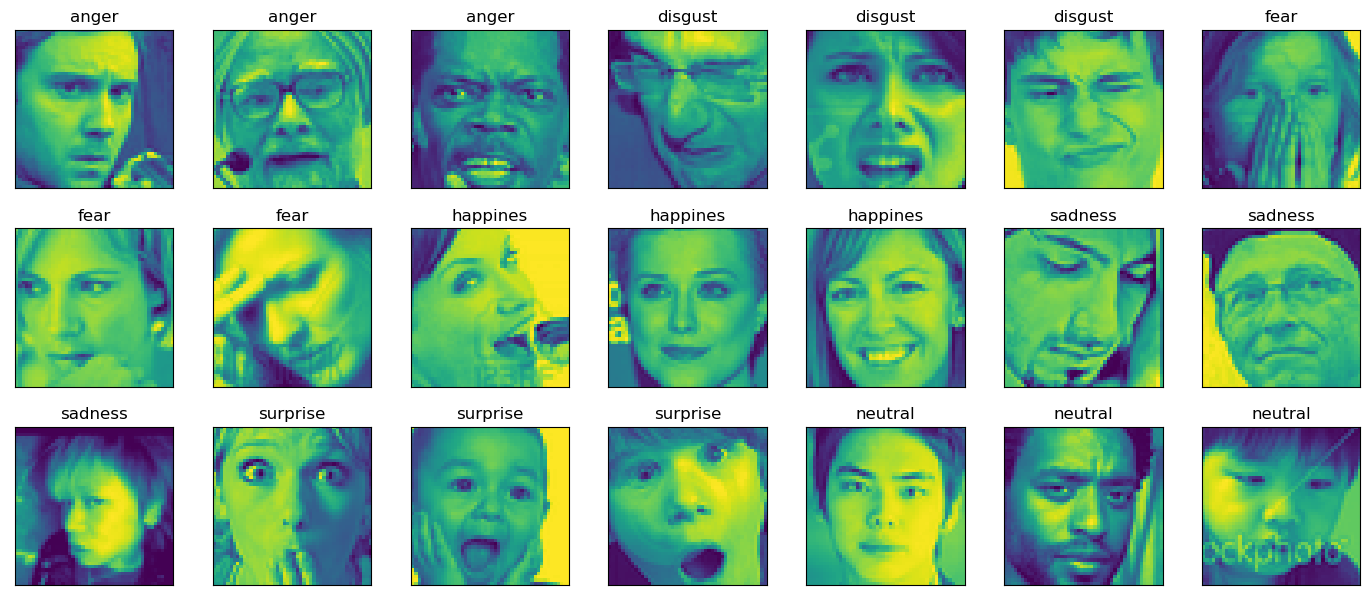

In [6]:
fig = pyplot.figure(1, (14, 14))
k=0
for label in sorted(images.emotion.unique()):
    for j in range(3):
        px = images[images.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [7]:
image_array = images.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

In [8]:
image_array = np.stack(image_array, axis=0)

In [9]:
labels = images.emotion.values

In [10]:
#We have found that the test size works best at 0.1 rather than 0.2
X_train, X_test, y_train, y_test = train_test_split(image_array, labels, test_size=0.1)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298,), (3589,))

In [12]:
X_train = X_train/255
X_test = X_test/255

In [20]:
#0.56811 validation accuracy. With 50 epochs and 0.2 in validation split. Sparse categorical loss function. 
#Adam optimizer. learning rate 0.0001
def third_cnn():
    
    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),    
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(), 
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(), 
                                    
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(), 
                                    
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4096, activation='relu'),
                                    tf.keras.layers.Dense(7, activation='softmax')
                                    
                                    
                                   ])

    return model

model = third_cnn()

In [21]:
#Adam as an optimizer has been found to be the best and using 0.001 is the most fitting learning rate for 50 epochs.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = ('sparse_categorical_crossentropy'), metrics = ['accuracy'])

In [18]:
file_name = 'best_model.h5'
checkpoint_path = os.path.join('checkpoint',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              monitor='val_accuracy',
                                              verbose=1,
                                              save_freq='epoch',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              mode='max')

In [ ]:
#You can cancel the running of this line and still have the best epoch saved
model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=call_back)

Epoch 1/50
808/808 [==============================] - ETA: 0s - loss: 1.6937 - accuracy: 0.3730
Epoch 1: val_accuracy improved from -inf to 0.43529, saving model to checkpoint\best_model.h5
808/808 [==============================] - 214s 263ms/step - loss: 1.6937 - accuracy: 0.3730 - val_loss: 1.4357 - val_accuracy: 0.4353
Epoch 2/50
808/808 [==============================] - ETA: 0s - loss: 1.3725 - accuracy: 0.4761
Epoch 2: val_accuracy improved from 0.43529 to 0.51548, saving model to checkpoint\best_model.h5
808/808 [==============================] - 220s 272ms/step - loss: 1.3725 - accuracy: 0.4761 - val_loss: 1.2798 - val_accuracy: 0.5155
Epoch 3/50
807/808 [============================>.] - ETA: 0s - loss: 1.2484 - accuracy: 0.5270
Epoch 3: val_accuracy improved from 0.51548 to 0.54752, saving model to checkpoint\best_model.h5
808/808 [==============================] - 211s 262ms/step - loss: 1.2483 - accuracy: 0.5269 - val_loss: 1.2046 - val_accuracy: 0.5475
Epoch 4/50
808/808 

Epoch 29/50
808/808 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.9123
Epoch 29: val_accuracy did not improve from 0.58978
808/808 [==============================] - 268s 331ms/step - loss: 0.2449 - accuracy: 0.9123 - val_loss: 1.7133 - val_accuracy: 0.5842
Epoch 30/50
808/808 [==============================] - ETA: 0s - loss: 0.2411 - accuracy: 0.9155
Epoch 30: val_accuracy did not improve from 0.58978
808/808 [==============================] - 271s 335ms/step - loss: 0.2411 - accuracy: 0.9155 - val_loss: 1.6489 - val_accuracy: 0.5728
Epoch 31/50
808/808 [==============================] - ETA: 0s - loss: 0.2339 - accuracy: 0.9202
Epoch 31: val_accuracy did not improve from 0.58978
808/808 [==============================] - 241s 298ms/step - loss: 0.2339 - accuracy: 0.9202 - val_loss: 1.7182 - val_accuracy: 0.5856
Epoch 32/50
808/808 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9166
Epoch 32: val_accuracy did not improve from 0.58978

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(50):
    print(f'actual label is {label_to_text[y_test[k]]}')
    predicted_class = final_model.predict(tf.expand_dims(X_test[k], 0)).argmax()
    print(f'predicted label is {label_to_text[predicted_class]}')
    pyplot.imshow(X_test[k].reshape(48,48))
    pyplot.show()
    time.sleep(3)
    clear_output(wait=True)

# Earlier versions of the CNN model and their test results

In [ ]:
#0.54536 validation accuracy. With 50 epochs and 0.2 in validation split. Sparse categorical loss function. 
#RMSprop optimizer. learning rate 0.0001

#0.56718 validation accuracy. With 50 epochs and 0.2 in validation split. Sparse categorical loss function. 
#Adam optimizer. learning rate 0.0001
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape = (48, 48, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(4096, activation='relu'),
                                    tf.keras.layers.Dense(7, activation='softmax')
                                    
                                    
                                   ])

In [ ]:
#0.54536 validation accuracy. With 50 epochs and 0.2 in validation split. Sparse categorical loss function. 
#RMSprop optimizer. learning rate 0.0001

#0.55851 validation accuracy. With 50 epochs and 0.2 in validation split. Sparse categorical loss function. 
#Adam optimizer. learning rate 0.0001


#0.39133 validation accuracy. With 50 epochs and 0.2 in validation split. Sparse categorical loss function. 
#Adam optimizer. learning rate 0.0001
def fer_improved_cnn():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(64, activation='relu'))

    model.add(tf.keras.layers.Dense(7, activation='softmax'))

    return model

model = fer_improved_cnn()